# Статистика, DS-поток
## Практическое задание 8


**Правила:**

* Дедлайн **2 ноября 16:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 12 баллов;
* Задача 3 &mdash; 8 баллов.

**Важность задач:**

* *высокая:* задачи 1-3.

<font color="red">**Замечание**. В этом задании могут быть "скрытые" критерии, то есть "заказчик" хочет что-то, что явно не указал в условии. Пока что они достаточно простые. Если вы внимательно следите за удобством восприятия информации в вашем решении, учитываете советы по оформлению, то вам не составит труда выполнить эти критерии. В дальнейших заданиях подобные предупреждения могут отсутствовать.</font>

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(font_scale=1.5, palette='Set2')
sns.set_style('whitegrid')

import plotly
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


_____
## Задача 1.

Существует примета, что если перед вами дорогу перебегает черный кот, то скоро случится неудача. 
Вы же уже достаточно хорошо знаете статистику и хотите проверить данную примету. 
Сформулируем задачу на математическом языке. 

Пусть $X_1, ..., X_n \sim Bern(p)$ &mdash; проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ &mdash; неизвестная вероятность такого события. 
Вы хотите проверить гипотезу $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Нулевая гипотеза означает отсутствие связи между черным котом и неудачей, первая &mdash; что неудача происходит чаще если черный кот перебегает дорогу.

На семинаре получено, что $S = \left\{T(x) \geqslant c_\alpha\right\}$, где $T(X) = \sum\limits_{i=1}^n X_i$, является равномерно наиболее мощным критерием для проверки этих гипотез. 
Чему при этом равно $c_\alpha$?

Для удобства возьмем не $S = \left\{T(x) \geqslant c_\alpha\right\}$, а $S = \left\{T(x) \gt c_\alpha\right\}$, чтобы удобнее было считать и не приходилось возиться с $\pm 1$

$c_{\alpha} = u_{1-\alpha}$, т.е. $1-\alpha$ квантиль $\xi \sim Bin(n, p)$. Случаи здесь разбирать не нужно для дискретного распределения, так как $F_{\xi}(c_{\alpha}) \ge 1-\alpha \implies P_{\theta_0}(X \in S) = 1 - F_{\xi}(c_{\alpha}) \le \alpha$


In [43]:
alpha = 0.05
n = 100
p = 1/2

distr = sps.binom(n=n, p=p)
c_alpha = distr.ppf((1 - alpha))
distr.sf(c_alpha) <= alpha

True

Проверьте, что критерий работает.
Возьмите несколько значений $n$ и реализаций статистики $T(X)$.
В каждом случае найдите значение $c_\alpha$, а также результат процедуры проверки гипотез 0/1 &mdash; отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).
Оформите это в виде таблицы, можно через `pandas.DataFrame`.

*Замечание:* Пользуйтесь функциями из `scipy.stats`.

In [44]:
ns = np.arange(10, 201, 20)
ps = np.linspace(0.01, 0.99, 11)
ns, ps

(array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190]),
 array([0.01 , 0.108, 0.206, 0.304, 0.402, 0.5  , 0.598, 0.696, 0.794,
        0.892, 0.99 ]))

In [45]:
alpha = 0.05
c_alpha = sps.binom.ppf(n=ns, p=0.5, q=(1-alpha))
real_alpha = sps.binom.sf(n=ns, p=0.5, k=c_alpha)
np.all(real_alpha <= 0.05), c_alpha.shape

(True, (10,))

In [46]:
nsamples = 10000
Ns, Ps = np.meshgrid(ns, ps)

samples = sps.binom.rvs(n=Ns, p=Ps, size=(nsamples, *Ns.shape))

samples.shape

(10000, 11, 10)

In [47]:
test = samples > c_alpha.reshape((1, 1, -1))
count_rejects = pd.DataFrame(data=test.sum(axis=0), index=['p={:.3f}'.format(p) for p in ps], columns=['n='+ str(n) for n in ns])
print(f"Число раз, когда гипотеза H_0 была отвергнута при проведении \nN = {nsamples} экспериментов с соотвествующими параметрами распределения n и p")
count_rejects

Число раз, когда гипотеза H_0 была отвергнута при проведении 
N = 10000 экспериментов с соотвествующими параметрами распределения n и p


,n=10,n=30,n=50,n=70,n=90,n=110,n=130,n=150,n=170,n=190
p=0.010,0,0,0,0,0,0,0,0,0,0
p=0.108,0,0,0,0,0,0,0,0,0,0
p=0.206,0,0,0,0,0,0,0,0,0,0
p=0.304,7,1,0,0,0,0,0,0,0,0
p=0.402,25,29,9,3,2,0,0,0,0,0
p=0.500,116,483,299,390,347,337,480,414,371,454
p=0.598,456,2792,3331,4388,5203,5973,7212,7594,7889,8539
p=0.696,1367,7135,8410,9441,9804,9922,9988,9993,9996,9999
p=0.794,3578,9688,9970,9999,10000,10000,10000,10000,10000,10000
p=0.892,7064,9997,10000,10000,10000,10000,10000,10000,10000,10000


In [48]:
mean_rejects = pd.DataFrame(data=test.mean(axis=0), index=['p={:.3f}'.format(p) for p in ps], columns=['n='+ str(n) for n in ns])
print(f"Теперь то же самое, но с точки зрения частоты, \nN = {nsamples} экспериментов с соотвествующими параметрами распределения n и p")
mean_rejects

Теперь то же самое, но с точки зрения частоты, 
N = 10000 экспериментов с соотвествующими параметрами распределения n и p


,n=10,n=30,n=50,n=70,n=90,n=110,n=130,n=150,n=170,n=190
p=0.010,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
p=0.108,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
p=0.206,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
p=0.304,0.0007,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
p=0.402,0.0025,0.0029,0.0009,0.0003,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000
p=0.500,0.0116,0.0483,0.0299,0.0390,0.0347,0.0337,0.0480,0.0414,0.0371,0.0454
p=0.598,0.0456,0.2792,0.3331,0.4388,0.5203,0.5973,0.7212,0.7594,0.7889,0.8539
p=0.696,0.1367,0.7135,0.8410,0.9441,0.9804,0.9922,0.9988,0.9993,0.9996,0.9999
p=0.794,0.3578,0.9688,0.9970,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
p=0.892,0.7064,0.9997,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Теперь для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05.

In [9]:
# функция из тырнета
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

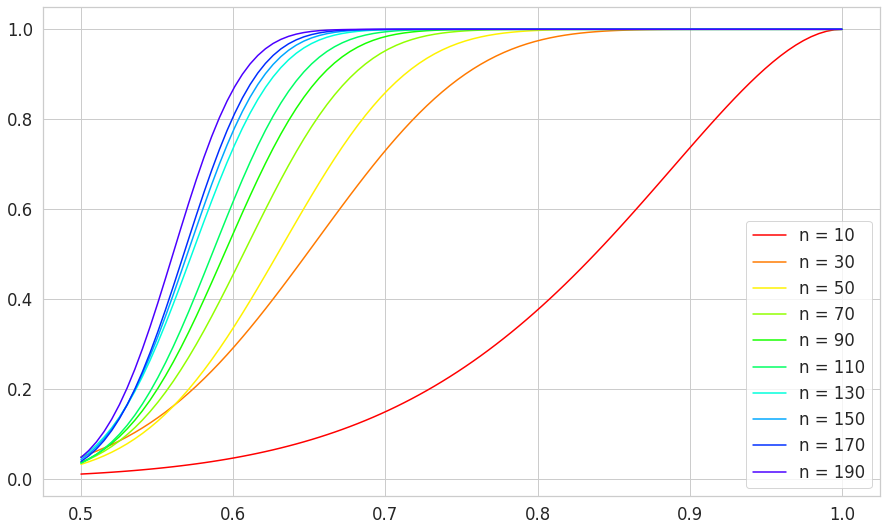

In [49]:
ps = np.linspace(0.5, 1, 100)

Ns, Ps = np.meshgrid(ns, ps)
power = sps.binom.sf(n=Ns, p=Ps, k=c_alpha).T

labels = ['n = ' + str(n) for n in ns]

cmap = get_cmap(10*ns.shape[0])
plt.figure(figsize=(15, 9))
for i, (values_for_n, label) in enumerate(zip(power, labels)):
    plt.plot(ps, values_for_n, color=cmap(8*i), label=label)
plt.legend()
plt.show()

**Вывод:** <...>

_____
## Задача 2.

На практике часто рассматривают асимптотические критерии, например, критерий Вальда. Такие критерии контролируют вероятность ошибки I рода на уровне $\alpha$ только в пределе, однако для небольших выборок она может сильно отличаться от $\alpha$, причем не редко в большую сторону. Поэтому для таких критериев возникает необходимость в вычислении значения вероятности ошибки I рода или *реального уровня значимости* при конечной выборке.

Зачастую посчитать точное значение реального уровня значимости довольно сложно, поэтому вместо него вычисляют оценку с помощью семплирования по методу Монте-Карло.

Пусть гипотеза $\mathsf{H}_0$ простая, то есть $\mathsf{H}_0\colon \mathsf{P} = \mathsf{P}_0$. Для ее проверки по конечной выборке $X_1, ..., X_n$ используется критерий $S$. Опишите схему оценки реального уровня значимости критерия $S$ методом Монте-Карло.

Если гипотеза $\mathsf{H}_0$ сложная, то есть $\mathsf{H}_0\colon \mathsf{P} \in \mathscr{P}_0$, то можно повторить такую процедуру несколько раз для разных $\mathsf{P} \in \mathscr{P}_0$.

Рассмотрим альтернативную гипотезу $\mathsf{H}_1\colon \mathsf{P} \in \mathscr{P}_1$. Опишите схему оценки мощности критерия $S$ методом Монте-Карло.

**TEXT 1 во вложениях**

Пусть $X_1, ..., X_n$ &mdash; выборка из пуассоновского распределения с параметром $\theta$. Рассмотрим гипотезы $\mathsf{H}\colon \theta = 1\ \ vs.\ \ \mathsf{H}\colon \theta \not= 1$ и критерий Вальда для их проверки.

**1.** Посчитайте реальный уровень значимости критерия для размеров выборки $1 \leqslant n \leqslant 50$ и визуализируйте полученную зависимость.

Теоретические вычисления в доп файлах (**TEXT 2 во вложениях**)

In [21]:
theta_0 = 1
alpha = 0.05
z = sps.norm.ppf(1-alpha/2)

def count_monte_carlo(func, ns, thetas, nsamples, count_power=False):
    thetas, ns = np.meshgrid(thetas, ns)
    samples = sps.poisson.rvs(mu=ns*thetas, size=(nsamples, *ns.shape))

    integ = func(samples, ns).mean(axis=0)

    if not count_power:
        return integ
    else:
        w_theta = np.sqrt(ns) * (thetas - theta_0) / np.sqrt(samples.mean(axis=0) / ns)
        power = sps.norm.sf(z - w_theta) + sps.norm.cdf(-z - w_theta) 
        return integ, power


# I(X in S)
# умножаем, т.к. x может быть равен 0 и из-за этого проблемы
def getIXinS(condS):
    def IXinS(x, ns):
        return condS(x, ns)
    return IXinS

ns = np.arange(1, 51)
IXinS = getIXinS(lambda x, ns: np.abs(x - ns) >= z * np.sqrt(x))

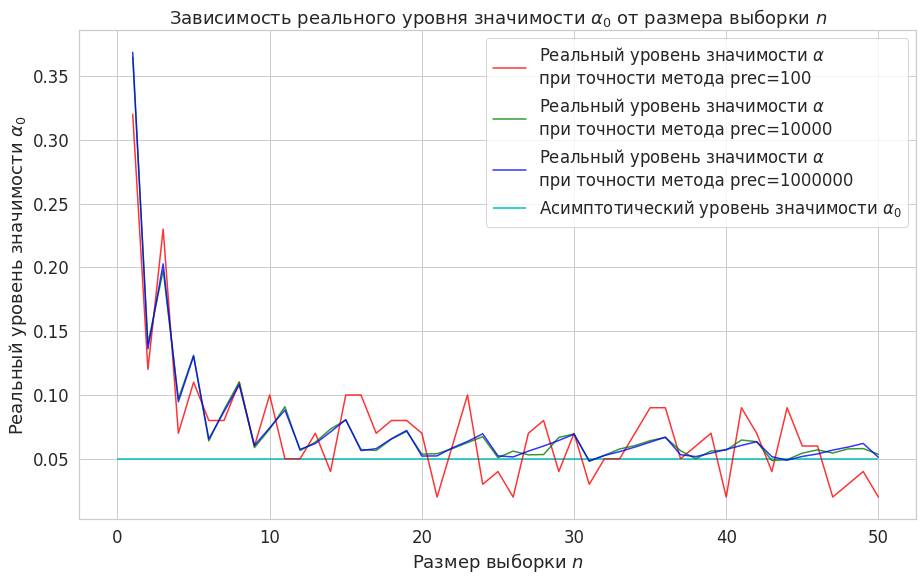

In [23]:
plt.figure(figsize=(15, 9))

for color, prec in zip(['r', 'g', 'b'], [100, 10000, 1000000]):
    plt.plot(ns, count_monte_carlo(IXinS, ns, theta_0, prec), color=color, alpha=0.8,
             label=f'Реальный уровень значимости $\\alpha$\nпри точности метода prec={prec}')

plt.hlines(alpha, 0, 50, colors='c', label='Асимптотический уровень значимости $\\alpha_0$')

plt.xlabel('Размер выборки $n$')
plt.ylabel('Реальный уровень значимости $\\alpha_0$')
plt.title('Зависимость реального уровня значимости $\\alpha_0$ от размера выборки $n$')

plt.legend()
plt.show()

**Вывод:**

При небольших значениях $n$ реальный уровень значимости значительно превышает требуемое значение

Но при значениях порядка 50 в нашем случае при хорошей точности вычисления методом Монте-Карло можно увидеть, что реальное значение мощности хорошо приближается к требуемому (в нашем случае, это $\alpha = 0.05$), а значит даже при не самых больших n (т.е. в пределах сотни, а не тысяч) асимптотический критерий будет иметь хорошую значимость

**2.** Для значений $n \in \{5, 15, 50\}$ посчитайте функцию мощности критерия для значений $\theta \in (0, 5)$ по сетке с шагом 0.01 по методу Монте-Карло. Визуализируйте полученные зависимости. Посчитайте также мощность критерия по асимптотической формуле, полученной на лекции, и сравните с оценкой мощности методом Монте-Карло. Учтите, что асимптотическая формула содержит $n$, поэтому для нее тоже должно быть три зависимости.

In [13]:
ns = np.array([5, 15, 50])
thetas = np.arange(0.01, 5, 0.01)

beta_real, beta_asymp1 = count_monte_carlo(IXinS, ns, thetas, 50000, count_power=True)

w_theta = np.sqrt(ns[:, np.newaxis]) * (thetas - theta_0) / np.sqrt(thetas)
beta_asymp2 = sps.norm.sf(z - w_theta) + sps.norm.cdf(-z - w_theta) 

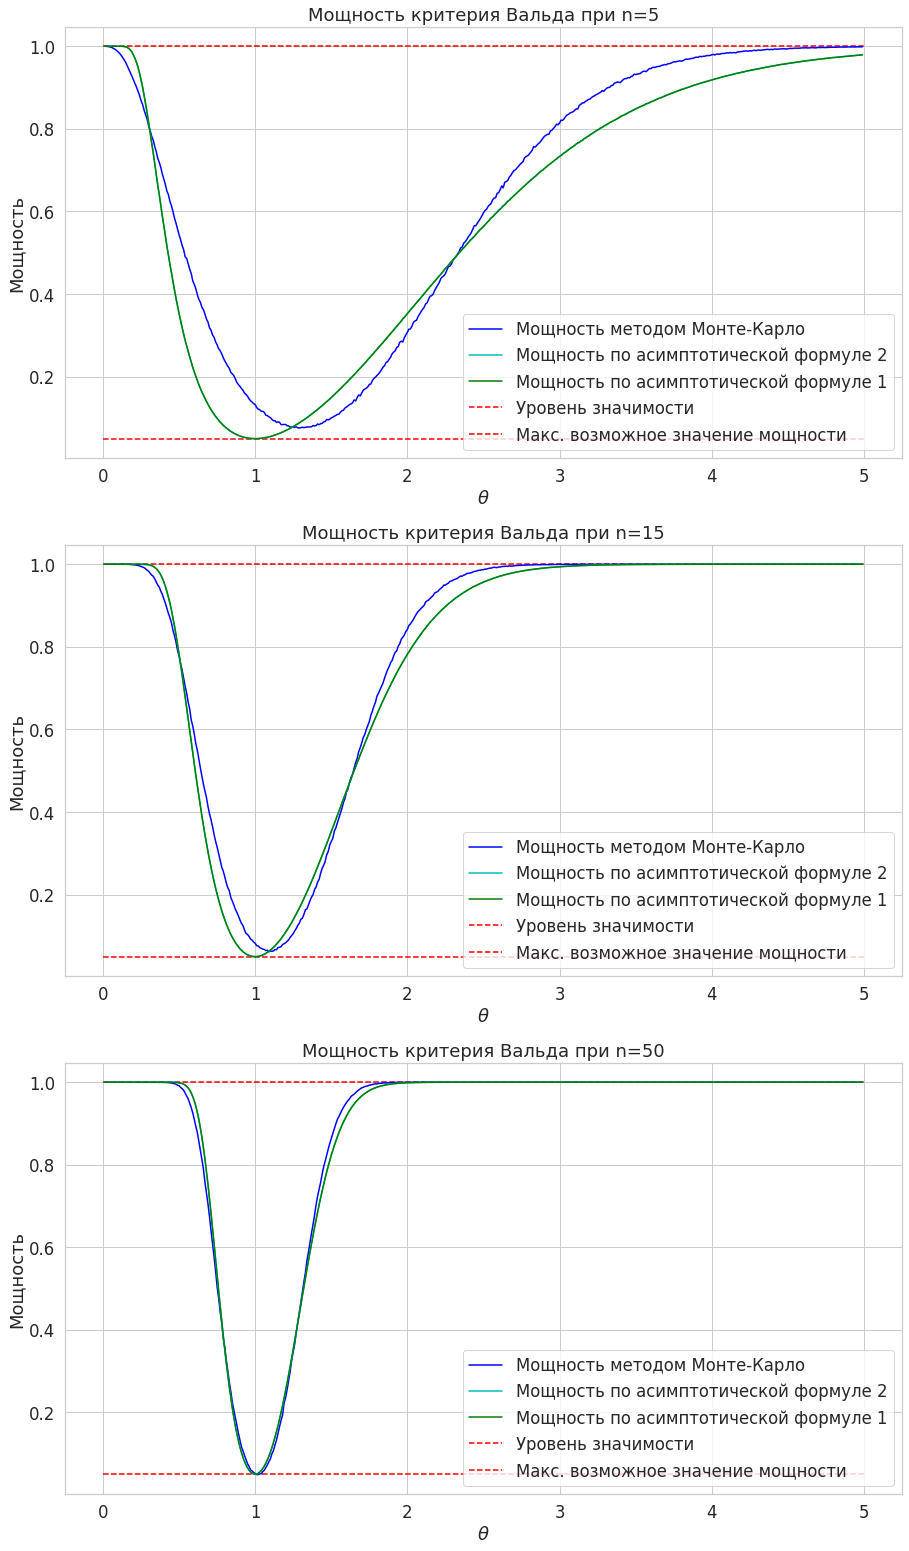

In [14]:
fig, axs = plt.subplots(3, figsize=(15, 27))

for n, ax, b_r, b_a1, b_a2 in zip(ns, axs, beta_real, beta_asymp1, beta_asymp2):
    ax.hlines(alpha, 0, 5, linestyles='dashed', colors='r', label='Уровень значимости')
    ax.hlines(1, 0, 5, linestyles='dashed', colors='r', label='Макс. возможное значение мощности')
    ax.plot(thetas, b_r, color='b', label='Мощность методом Монте-Карло')
    ax.plot(thetas, b_a2, color='c', label='Мощность по асимптотической формуле 2')
    ax.plot(thetas, b_a1, color='g', label='Мощность по асимптотической формуле 1')

    ax.legend()
    ax.set_title(f'Мощность критерия Вальда при n={n}')
    ax.set_xlabel('$\\theta$')
    ax.set_ylabel('Мощность')

**Вывод:** 

Для начала, небольшое объяснение: на графике должно отображаться 2 варианта асиптотической формулы: с состоятельной оценкой асимпт. дисперсии в знаменателе $w(\theta)$ (1) и с теоретическим значением таковой (2). Однако, графики наложились, что показывает, что в данном случае хватает подставить даже теоретическое значение, а не оценку

На практике видим, как график мощности критерия сходится к асимптотическому значению мощности, выведенное аналогично лекции. И хоть при небольших n мы видим, что графики пересекаются, имеют разные минимумы и точки минимума, при $n=50$ графики хорошо сопадают, что показывает, что асимпт. критерий достаточно точен при таких значениях

**3.** Пусть $n=50$. Сравните мощности критериев, соответствующих двусторонней, левосторонней и правосторонней альтернативам.

Вывод всех альтернатив в **TEXT 3 во вложениях**

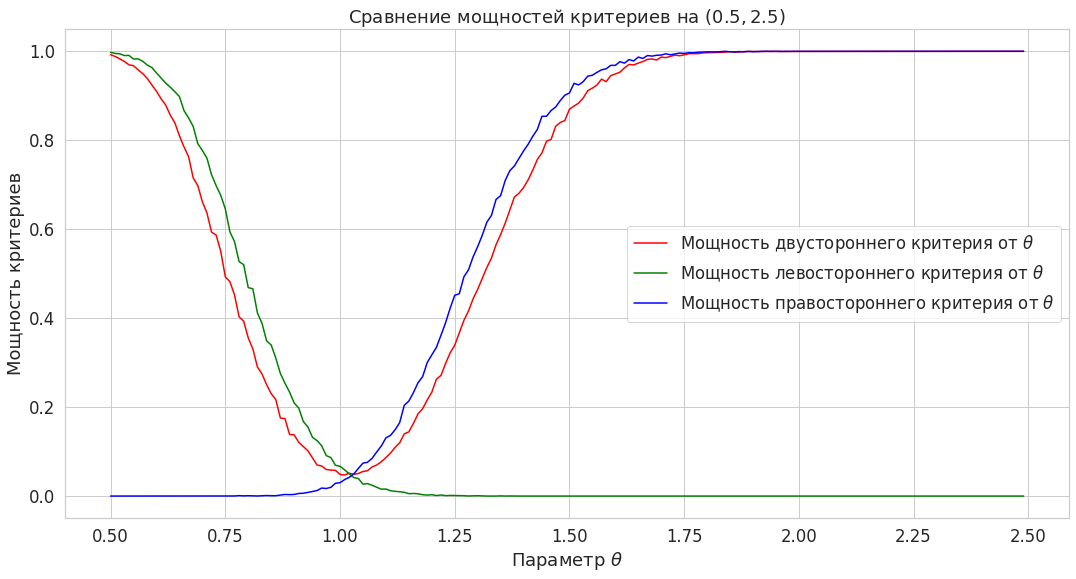

In [15]:
z_2_side = sps.norm.ppf(1-alpha/2)
z_left = sps.norm.ppf(alpha)
z_right = sps.norm.ppf(1-alpha)

cond_2_side = lambda x, ns: np.abs(x - ns) >= z_2_side * np.sqrt(x)
cond_left = lambda x, ns: x - ns <= z_left * np.sqrt(x)
cond_right = lambda x, ns: x - ns >= z_right * np.sqrt(x)

n = 50 
xlim = (0.5, 2.5)
thetas = np.arange(*xlim, 0.01)

plt.figure(figsize=(18, 9))

beta_real_2_side = count_monte_carlo(getIXinS(cond_2_side), n, thetas, 5000)
plt.plot(thetas, beta_real_2_side.T, color='r', label="Мощность двустороннего критерия от $\\theta$")

beta_real_left = count_monte_carlo(getIXinS(cond_left), n, thetas, 5000)
plt.plot(thetas, beta_real_left.T, color='g', label="Мощность левостороннего критерия от $\\theta$")

beta_real_right = count_monte_carlo(getIXinS(cond_right), n, thetas, 5000)
plt.plot(thetas, beta_real_right.T, color='b', label="Мощность правостороннего критерия от $\\theta$")

plt.ylabel("Мощность критериев")
plt.xlabel("Параметр $\\theta$")
plt.title(f"Сравнение мощностей критериев на ${xlim}$")
plt.legend()
plt.show()

**Вывод:**

Получили уже знакомое поведение, аналогичное случаю с нормальным распределением на лекции. Т.е. односторонние критерии максимизируют только на "своей" части множества $\Theta$, а одностороннему нужно это делать сразу везде, поэтому получается, что при стремлении $\theta$ к 0 и $+\infty$ получаем одинаковое стремление к 1, но тем не менее, односторонние критерии лучше на своих "доменах", чем двусторонний

**Вопрос на подумать.** Сколько семплирований в методе Монте-Карло нужно сделать, чтобы оценить реальный уровень значимости с точностью до 0.001? Иначе говоря, значения (0.049, 0.051) можно принять за 0.05.

_____
## Задача 3.

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно. Рассмотрим основную гипотезу $\mathsf{H}\colon \theta = 2$.

**1.** Для размеров выборки $n \in \{5, 15, 30, 50, 100\}$ посчитайте реальный уровень значимости критерия Вальда для двусторонней альтернативы в зависимости от значений $\beta$. Визуализируйте полученные зависимости.

Теор вычисления в для а.д. и прочего в **TEXT 4 во вложениях**

В коде, соответственно, реализован подсчет матриц $\Sigma$, $\nabla\tau_{\theta}$ и подсчет ас. дисп с помощью них

In [75]:
ns = np.array([5, 15, 30, 50, 100])
theta_0 = 2
betas_lim = (1, 5)
betas = np.linspace(*betas_lim, 401)
nsamples = 5000
alpha = 0.05
z = sps.norm.ppf(1 - alpha / 2) 

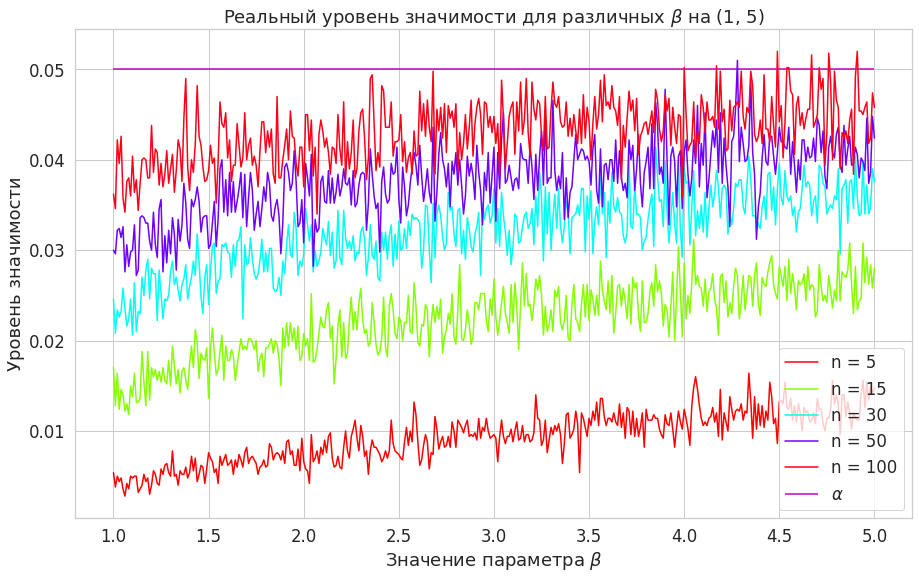

In [76]:
def Sigma(theta, beta):
    s11 = beta / theta**2
    s22 = beta*(beta+1)*(4*beta+6) / theta**4
    s12 = 2*beta*(beta+1) / theta**3
    return np.array([[s11, s12], [s12, s22]])

def dtau_theta_dx(theta, beta):
    return np.array([
                (2*beta + 1)/beta * theta**2,
                -theta**3 / beta
            ])

def asymp_sigma(theta, beta):
    dtau = dtau_theta_dx(theta, beta)
    S = Sigma(theta, beta)
    
    return np.sqrt(dtau[0]**2 * S[0][0] + 2 * dtau[0] * S[0][1]* dtau[1] + dtau[1]**2 * S[1][1])

cond = lambda n, theta, beta: np.abs(np.sqrt(n) * (theta - theta_0)) >= z * asymp_sigma(theta, beta)
samples = sps.gamma(a=betas, scale=(1/theta_0)).rvs(size=(ns.max(), nsamples, betas.size))

cmap = get_cmap(ns.size)
fig = plt.figure(figsize=(15, 9))
for i, n in enumerate(ns):
    sample = samples[:n]
    theta_estim = sample.mean(axis=0) / ((sample**2).mean(axis=0) - sample.mean(axis=0)**2)
    beta_estim = sample.mean(axis=0)**2 / ((sample**2).mean(axis=0) - sample.mean(axis=0)**2)

    results = cond(n, theta_estim, beta_estim).mean(axis=0)
    plt.plot(betas, results, color=cmap(i), label="n = {}".format(n))

plt.hlines(alpha, *betas_lim, colors='m', label='$\\alpha$')
plt.ylabel("Уровень значимости")
plt.xlabel("Значение параметра $\\beta$")
plt.title(f"Реальный уровень значимости для различных $\\beta$ на {betas_lim}")
plt.legend()
plt.show()

**Вывод:** 

Необычно, что с увеличением размера выборки мы получили, что увеличивается значимость критерия. Возможно, это коснется не только значимости, но и мощности критерия, вроде "реже выкидываем, но и реже оказываемся правы" 

**2.** Сравните по мощности РНМК и критерий Вальда для левосторонней и правосторонней альтернатив, а также двусторонней альтернативы для критерия Вальда.

Вывод всех мощностей (а точнее, копипаста из теордомашки) в **TEXT 5 во вложениях** 

In [ ]:
z_2_side = sps.norm.ppf(1-alpha/2)
z_left = sps.norm.ppf(alpha)
z_right = sps.norm.ppf(1-alpha)

samples = sps.gamma(a=betas, scale=(1/theta_0)).rvs(size=(ns.max(), nsamples, betas.size))

cond_2_side = lambda n, theta, beta: np.abs(np.sqrt(n) * (theta - theta_0)) >= z * asymp_sigma(theta, beta)

n = 50 
xlim = (0.5, 2.5)
thetas = np.arange(*xlim, 0.01)

plt.figure(figsize=(18, 9))

beta_real_2_side = count_monte_carlo(getIXinS(cond_2_side), n, thetas, 5000)
plt.plot(thetas, beta_real_2_side.T, color='r', label="Мощность двустороннего критерия от $\\theta$")

beta_real_left = count_monte_carlo(getIXinS(cond_left), n, thetas, 5000)
plt.plot(thetas, beta_real_left.T, color='g', label="Мощность левостороннего критерия от $\\theta$")

beta_real_right = count_monte_carlo(getIXinS(cond_right), n, thetas, 5000)
plt.plot(thetas, beta_real_right.T, color='b', label="Мощность правостороннего критерия от $\\theta$")

plt.ylabel("Мощность критериев")
plt.xlabel("Параметр $\\theta$")
plt.title(f"Сравнение мощностей критериев на ${xlim}$")
plt.legend()
plt.show()

**Вывод:** <...>

In [77]:
%%shell
jupyter nbconvert --to html 'gdrive/My Drive/DS/task8/task8.ipynb'

[NbConvertApp] Converting notebook gdrive/My Drive/DS/task8/task8.ipynb to html
[NbConvertApp] Writing 1175682 bytes to gdrive/My Drive/DS/task8/task8.html
